In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv')

In [3]:
data.describe()

,Name,Base Pay,University or Office,Position
count,12632,12632,12632,12632
unique,12583,2126,15,3315
top,"Tucker, Joanne M",$107870,West Chester,Assistant Professor
freq,2,764,1628,1196


In [4]:
data['Position'].unique()

array(['University President', 'Provost & VP Academic Affairs',
       'Provost & VP for Academic Affairs', ...,
       'Vice President/Fin.Admin',
       'Vice Chancellor Academic & Student Affairs', 'Chancellor'], dtype=object)

In [5]:
data.isnull().values.any()

False

In [6]:
data.dtypes

Name                    object
Base Pay                object
University or Office    object
Position                object
dtype: object

In [7]:
data['Base Pay'] = data['Base Pay'].apply(lambda f: f[1:])

In [8]:
data.dtypes

Name                    object
Base Pay                object
University or Office    object
Position                object
dtype: object

In [9]:
data['Base Pay'] = data['Base Pay'].apply(lambda f: int(f))

In [10]:
data.dtypes

Name                    object
Base Pay                 int64
University or Office    object
Position                object
dtype: object

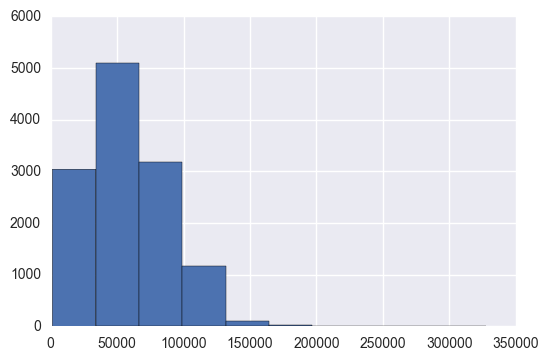

In [11]:
data['Base Pay'].hist()
plt.show()

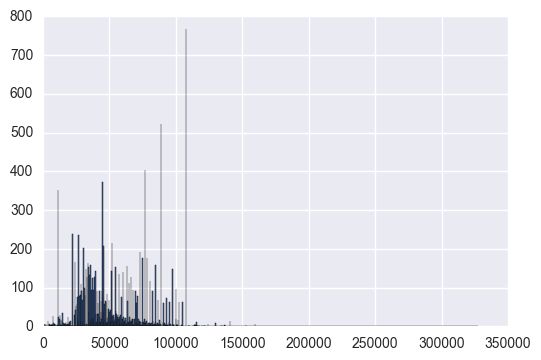

In [12]:
data['Base Pay'].hist(bins = 1000)
plt.show()

In [13]:
data['Base Pay'].min()

1245

In [14]:
data['Base Pay'].max()

327500

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x283b0b40b8>],
 'caps': [<matplotlib.lines.Line2D at 0x283b12e240>,
 'fliers': [<matplotlib.lines.Line2D at 0x283b1c67f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x283b18ebe0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x283b0c9f60>,
  <matplotlib.lines.Line2D at 0x283b0fdb70>]}

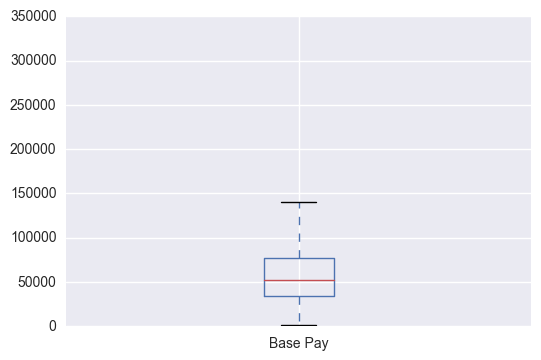

In [15]:
data.boxplot(column='Base Pay')

In [16]:
group_pos = data['Base Pay'].groupby(data['Position'])

In [17]:
group_place = data['Base Pay'].groupby(data['University or Office'])

In [18]:
group_pos.describe()

Position                                       
12 Mos-Assoc Prof Admin/Dir of Athletics  count         1.000000
                                          mean     115723.000000
                                          std                NaN
                                          min      115723.000000
                                          25%      115723.000000
                                          50%      115723.000000
                                          75%      115723.000000
                                          max      115723.000000
12 Mos-Asst. Prof. Asst. Athletic Direc   count         1.000000
                                          mean      90618.000000
                                          std                NaN
                                          min       90618.000000
                                          25%       90618.000000
                                          50%       90618.000000
                                          

In [19]:
group_pos_mean = group_pos.mean()

In [20]:
group_pos_mean

Position
12 Mos-Assoc Prof Admin/Dir of Athletics    115723.000000
12 Mos-Asst. Prof. Asst. Athletic Direc      90618.000000
55_Grant Funded Position                     44924.000000
9 Mo Asst. Director of Admissions            36270.000000
9MO Coord Student Srvc                       54257.000000
9Mo Admissions Counselor                     31305.000000
9Mo Area Coordinator                         35917.500000
9Mo Asst Dir Pgm & Ldrshp                    44220.000000
9Mo Coord, Campus Program & Recreation       34530.000000
9Mo Coordinator of Career Services           37185.000000
9Mo Coordinator, Assistive TechnologyCtr     45300.000000
9Mo Dir - Women's Center                     39045.000000
9Mo Dir-Wellness Programs                    48780.000000
9Mo Interpreter                              48780.000000
9Mo Residence Coord                          35415.000000
9Mo Residence Coordinator                    30540.000000
9MoResidence Hall Director                   34972.500000
9MosR

In [21]:
group_pos_mean.describe()

count      3315.000000
mean      63439.735566
std       31096.261717
min        2818.000000
25%       43247.000000
50%       57171.000000
75%       78531.000000
max      327500.000000
Name: Base Pay, dtype: float64

In [22]:
group_pos_mean.mean()

63439.73556639751

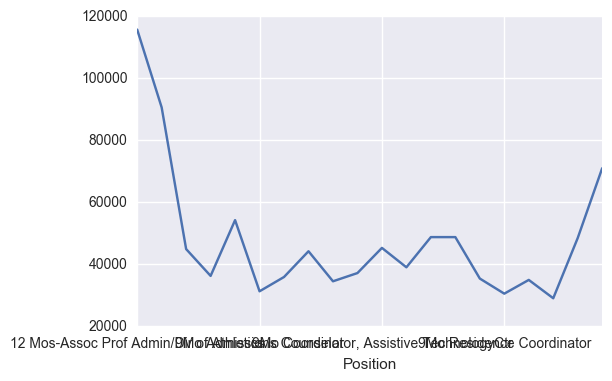

In [23]:
group_pos_mean.head(20).plot(kind = 'line')

In [24]:
group_pos_mean.describe()

count      3315.000000
mean      63439.735566
std       31096.261717
min        2818.000000
25%       43247.000000
50%       57171.000000
75%       78531.000000
max      327500.000000
Name: Base Pay, dtype: float64

In [25]:
group_place.describe()

University or Office           
Bloomsburg                count      1096.000000
                          mean      56145.716241
                          std       29721.213707
                          min        1411.000000
                          25%       34328.000000
                          50%       49387.000000
                          75%       74791.000000
                          max      207197.000000
California                count       884.000000
                          mean      54780.910633
                          std       29537.803172
                          min        2491.000000
                          25%       32372.000000
                          50%       48343.500000
                          75%       76661.000000
                          max      200820.000000
Cheyney                   count       287.000000
                          mean      55316.965157
                          std       28653.666798
                          min        

In [26]:
group_place_mean = group_place.mean()

In [27]:
group_place_mean.describe()

count       15.000000
mean     58600.054734
std       5740.873860
min      54092.442270
25%      55247.688967
50%      57534.781081
75%      59366.121400
max      77908.282051
Name: Base Pay, dtype: float64

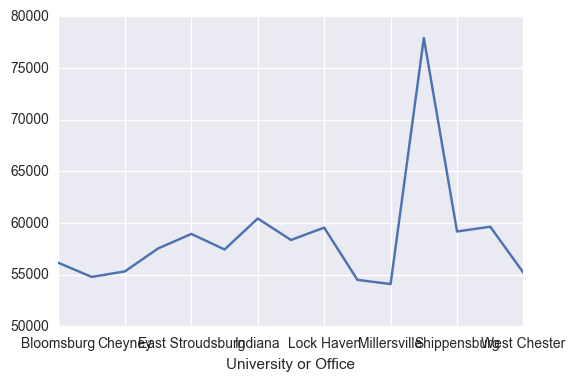

In [28]:
group_place_mean.plot(kind = 'line')

In [29]:
pos_groupby_loc = data['Position'].groupby(data['University or Office'])

In [30]:
pos_groupby_loc.describe()

University or Office            
Bloomsburg                count                    1096
                          unique                    333
                          top           Instructor-Temp
                          freq                      125
California                count                     884
                          unique                    319
                          top       Associate Professor
                          freq                       87
Cheyney                   count                     287
                          unique                    133
                          top                Instructor
                          freq                       36
Clarion                   count                     740
                          unique                    196
                          top                Instructor
                          freq                      117
East Stroudsburg          count                     719
               

In [31]:
type(pos_groupby_loc)

pandas.core.groupby.SeriesGroupBy

In [32]:
pos_groupby_loc.max()

University or Office
Bloomsburg                                          Web Specialist 2
California                              Workers Compensation Manager
Cheyney                            Vice President of Student Affairs
Clarion                                      Womens Basketball Coach
East Stroudsburg                                         Web Manager
Edinboro                                            Web Specialist 3
Indiana                                          Web Editor/Producer
Kutztown                                           Wtr Trmt Plnt Opr
Lock Haven                                            Web Specialist
Mansfield                           Web Master & Mgr Application Dev
Millersville                Wellness & Sport Sciences Dept Secretary
Office of the Chancellor                   Web Development Team Lead
Shippensburg                                            Web Designer
Slippery Rock                                          Web Developer
West Chester 

In [33]:
pos_groupby_loc_max = pos_groupby_loc.max()